# Final Project
# DS 160-01
# Introduction to Data Science 
# Spring 2024
# Kadin McWilliams

## Importing Libraries

In [2]:
#loading in and doing statistics on the data set
import pandas as pd
#Both of these are for visualization of the data set 
import matplotlib.pyplot as plt
import seaborn as sns 
#Manipualtion of arrays to create new things for graphs
import numpy as np 
#needed to import warning for a function
import warnings
#Ignores warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#for training model
from sklearn.model_selection import train_test_split
#for doing logistic Regression
from sklearn.linear_model import LogisticRegression
#for encoding y values
from sklearn.preprocessing import OrdinalEncoder
#for reporting my results with graphs and tables
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
#Finding p-values inorder to investigate data more
import statsmodels.api as sm

In [3]:
#showing a list of the versions of each library I used
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.1
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

## Basic Exploration of The Dataset

In [4]:
#creating the dataframe and getting a basic look at the data
ObeData=pd.read_csv('ObesityDataSet.csv')
ObeData.sample(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
619,18.372563,Female,1.589829,40.202773,Sometimes,yes,2.000000,1.075553,no,no,1.000000,no,0.127425,1.679442,Sometimes,Public_Transportation,Insufficient_Weight
1288,22.836315,Female,1.604893,82.000000,Sometimes,yes,1.008760,1.000000,no,no,2.000000,yes,0.000000,0.585912,Sometimes,Public_Transportation,Obesity_Type_I
734,18.000000,Male,1.708107,51.314659,Sometimes,yes,1.303878,3.000000,no,no,1.755497,yes,0.062932,1.672532,Sometimes,Public_Transportation,Insufficient_Weight
1713,27.394123,Male,1.764138,112.323213,Sometimes,yes,1.924632,3.000000,no,no,2.006595,yes,0.176800,0.511694,Sometimes,Automobile,Obesity_Type_II
1554,21.963787,Male,1.849601,122.333425,Sometimes,yes,3.000000,2.218285,no,no,1.340117,yes,0.428259,0.000000,Sometimes,Public_Transportation,Obesity_Type_II


### inital check of variables and data types in the dataset

In [5]:
ObeData.info()

#Checking for missing values 
print('\nMissing Data\n',ObeData.isnull().sum())

#Summary of findings
# 17 columns 
# 9 Object data types
# 8 Float data types 
# 2111 interies 
# There are no missing entries in this dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

### Exploring the columns to get a comprehensive idea of the values in each columns

In [6]:
print('\nColumn names:',ObeData.columns,'\n')
#Unique values in columns investiagiton
print('Gender unique values:',ObeData['Gender'].unique())
print('CALC unique values:',ObeData['CALC'].unique())
print('FAVC unique values:',ObeData['FAVC'].unique())
print('SCC unique values:',ObeData['SCC'].unique())
print('Family history with overweight unique values:',ObeData['family_history_with_overweight'].unique())
print('CAEC unique values:',ObeData['CAEC'].unique())
print('MTRANS unique values:',ObeData['MTRANS'].unique())
print('NObeyesdad unique values:',ObeData['NObeyesdad'].unique())


Column names: Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object') 

Gender unique values: ['Female' 'Male']
CALC unique values: ['no' 'Sometimes' 'Frequently' 'Always']
FAVC unique values: ['no' 'yes']
SCC unique values: ['no' 'yes']
Family history with overweight unique values: ['yes' 'no']
CAEC unique values: ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad unique values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


## Noteable Column information
- Age - minimum age is 14 and maximum age is 61, average age is 24
- Gender - 2 genders present, Male and Female 
- Height - is in meters, average is 1.7
- Weight -is in kg, average is 86.5kg
- CALC - How often do you drink alcohol? Possible answers:'no', 'Sometimes', 'Frequently', 'Always'
- FAVC - Do you eat high caloric food frequently? possible answers: 'yes','no'
- FCVC - Do you usually eat vegetables in your meals? range is 1-3 vegtablke per meal
- NCP - How many main meals do you have daily? range of answers is from 1-4
- SCC - Do you monitor the calories you eat daily? possible answers: 'yes','no'
- SMOKE - Do you smoke? possible answers: 'yes','no'
- CH2O - How much water do you drink daily? Range is 1-3 bottles of water drank
- family_history_with_overweight - possible answers: 'yes','no'
- FAF - How often do you do phyiscal activity? Hours of physical activity per day 0-3 
- TUE - How much time do you use technological devices (daily)? in hours range 0-2, check if skewed
- CAEC - Do you eat food inbetween meals? Possible answers: 'Sometimes' 'Frequently' 'Always' 'no'
- MTRANS - Which transportation do you use? Possible answers: 'Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'
- NObeyesdad - Obesity level? Possible answers: 'Insufficient_Weight' 'Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II' 'Obesity_Type_I' 'Obesity_Type_II' 'Obesity_Type_III'

#### Obesity type classifications
- Obesity_Type_I - BMI from 30.0 to 34.9
- Obesity_Type_II - BMI from 35.0 to 39.9
- Obesity_Type_III - BMI greater than 40

#### Need to create and fix 
- function that converts meters to feet and inches so that it is Easy to understand - done
- make a new column that is for imperial height - done
- Change weight to lbs for easier understanding - done
- Fix the numbers in columns by rounding: FCVC, CH20, FAF - illogical numbers - done
- Change variable names to make more sense so coding is easier - done
- Change height to cm - done
- Fix age to be only integers - done
- Change NCP to be only integers - done

## Cleaning up data for analysis

In [7]:
#function for text strings converting meters to imperical 
def CMtoFT(x):
    rawfoot=x/30.48
    inch=str(int(round((rawfoot-int(rawfoot))*12)))
    ft=str(int(rawfoot))
    return ft+"'"+inch

#Creating an imperial height for easier understanding of heights
rawfoot=ObeData['Height']*3.28084 
inch=(round((rawfoot-rawfoot.astype(int))*12).astype(int)).astype(str)
ft=(rawfoot.astype(int)).astype(str)
ObeData["Imperical_Height"]=ft+"'"+inch

#Changing weight from kg to lbs
ObeData['Weight']=(round(ObeData['Weight']*2.20462)).astype(int)

#Changing height from meters to centimeters
ObeData['Height']=ObeData['Height']*100

#changing where column is located
#ObeData.columns.values #this was for copy and pasting the columns so I didn't have to manually type them out 
ObeData=ObeData[['Age', 'Gender', 'Imperical_Height', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF',
       'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']]

#Fixing FCVC, CH20, FAF, Age, and NCP numbers to not be floating point numbers by rounding
#FCVC rounding
ObeData['FCVC']=round(ObeData['FCVC']).astype(int)
#CH20 rounding
ObeData['CH2O']=round(ObeData['CH2O']).astype(int)
#FAF rounding
ObeData['FAF']=round(ObeData['FAF']).astype(int)
#Age rounding
ObeData['Age']=round(ObeData['Age']).astype(int)
#NCP rounding
ObeData['NCP']=round(ObeData['NCP']).astype(int)

#Validation Checks
print('FCVC unique values:',ObeData['FCVC'].unique())
print('CH2O unique values:',ObeData['CH2O'].unique())
print('FAF unique values:',ObeData['FAF'].unique())
print('Age unique values:',ObeData['Age'].unique())
print('NCP unique values:',ObeData['NCP'].unique())

#Chaning column names to be easier to read
ObeData.rename(columns={'CALC':'Alcohol','FAVC':'HighCaloricIntake','FCVC':'VegtableIntake',
                        'NCP':'DailyMeals','SCC':'CalorieMonitoring','SMOKE':'Smoke',
                        'CH2O':'DailyWaterIntake','FAF':'PhysicalActivity','TUE':'TechnologyUsage',
                        'CAEC':'FoodBetweenMeals','NObeyesdad':'ObesityLevel'}, inplace=True)

ObeData.head()

FCVC unique values: [2 3 1]
CH2O unique values: [2 3 1]
FAF unique values: [0 3 2 1]
Age unique values: [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]
NCP unique values: [3 1 4 2]


,Age,Gender,Imperical_Height,Height,Weight,Alcohol,HighCaloricIntake,VegtableIntake,DailyMeals,CalorieMonitoring,Smoke,DailyWaterIntake,family_history_with_overweight,PhysicalActivity,TechnologyUsage,FoodBetweenMeals,MTRANS,ObesityLevel
0,21,Female,5'4,162.0,141,no,no,2,3,no,no,2,yes,0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,4'12,152.0,123,Sometimes,no,3,3,yes,yes,3,yes,3,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,5'11,180.0,170,Frequently,no,2,3,no,no,2,yes,2,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,5'11,180.0,192,Frequently,no,3,3,no,no,2,no,2,0.0,Sometimes,Walking,Overweight_Level_I
4,22,Male,5'10,178.0,198,Sometimes,no,2,1,no,no,2,no,0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Basic statistics on quantitative data

In [8]:
print(ObeData.describe())
# Most people in this data set are overweight from looking at the averages 
# Technology usage seemes to be oddly low for what I would have expected 
# Average person is 5'7 and weights 190lbs

               Age       Height       Weight  VegtableIntake   DailyMeals  \
count  2111.000000  2111.000000  2111.000000     2111.000000  2111.000000   
mean     24.315964   170.167735   190.861203        2.423496     2.687826   
std       6.357078     9.330482    57.763279        0.583905     0.809680   
min      14.000000   145.000000    86.000000        1.000000     1.000000   
25%      20.000000   163.000000   144.000000        2.000000     3.000000   
50%      23.000000   170.049900   183.000000        2.000000     3.000000   
75%      26.000000   176.846400   237.000000        3.000000     3.000000   
max      61.000000   198.000000   381.000000        3.000000     4.000000   

       DailyWaterIntake  PhysicalActivity  TechnologyUsage  
count       2111.000000       2111.000000      2111.000000  
mean           2.014685          1.006632         0.657866  
std            0.688616          0.895462         0.608927  
min            1.000000          0.000000         0.000000  
2

## Charts and graphs of dataset for data exploration

### Heatmap

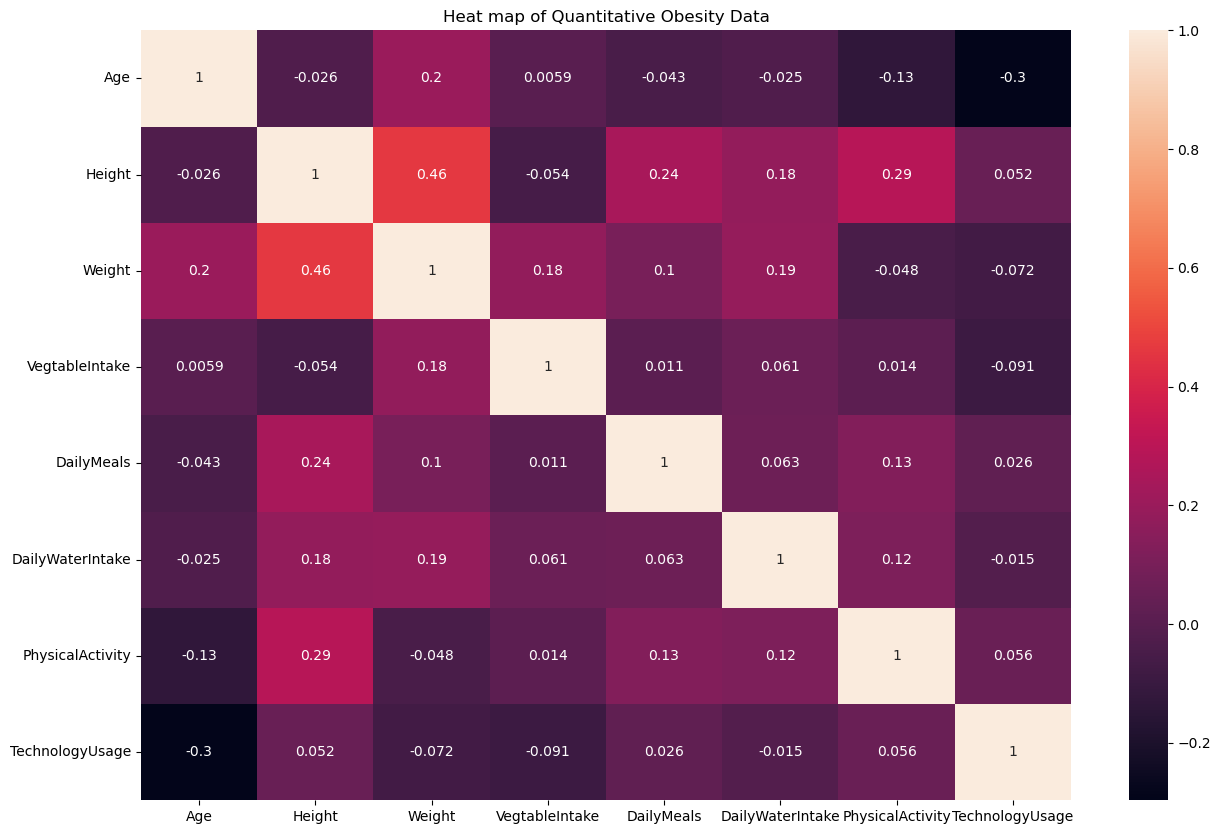

In [9]:
#selecting only quantiative data
obedata=ObeData[['Age','Height','Weight','VegtableIntake','DailyMeals','DailyWaterIntake',
                 'PhysicalActivity','TechnologyUsage']].corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(obedata, annot=True)
plt.title("Heat map of Quantitative Obesity Data")
plt.show()

### Pair Plot Overview

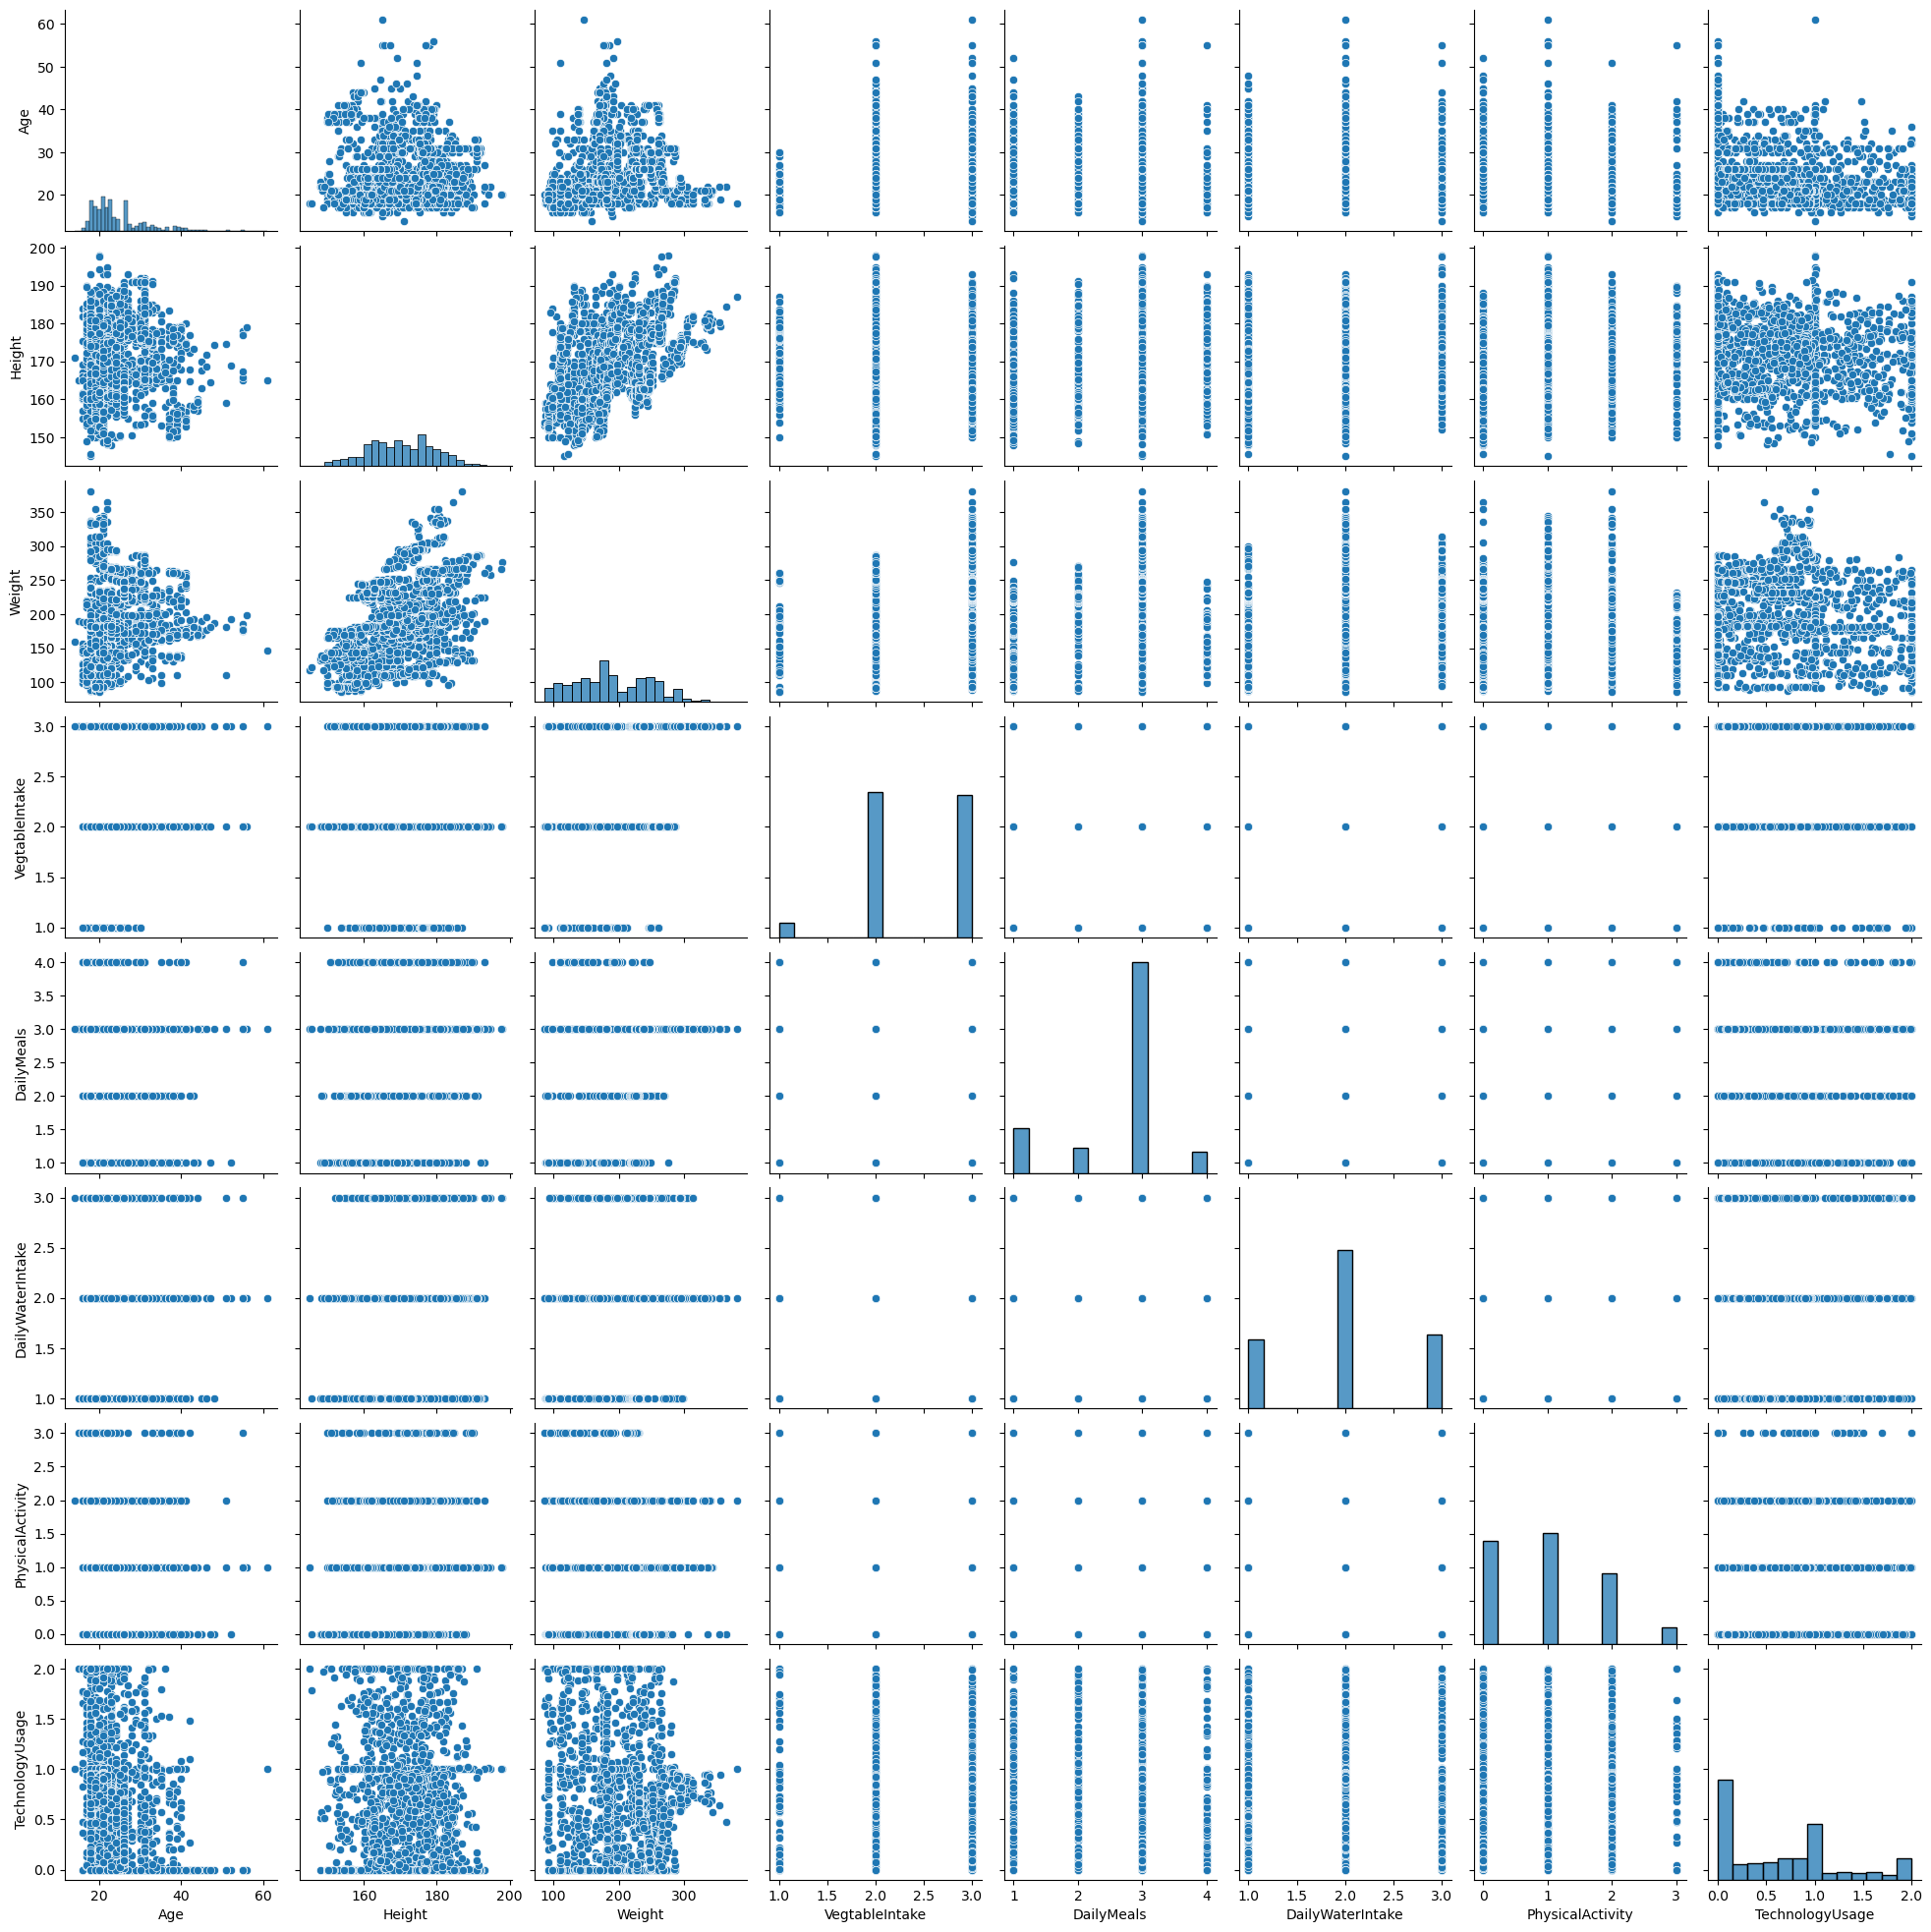

In [9]:
#basic pair plot
sns.pairplot(ObeData[['Age','Height','Weight','VegtableIntake','DailyMeals','DailyWaterIntake',
                 'PhysicalActivity','TechnologyUsage']])
plt.show()

### Linear Distribution Plot of Weight vs Height for Obesity Levels

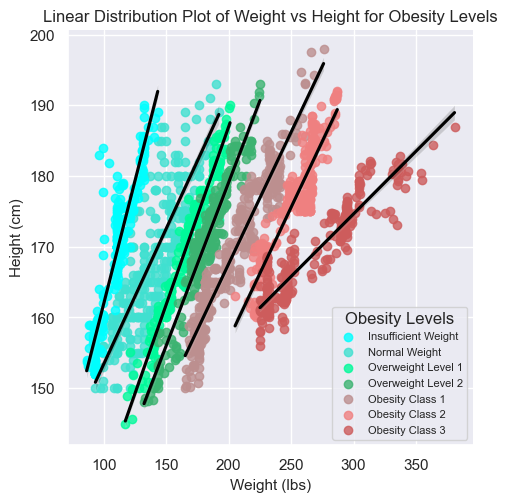

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
color_list=['turquoise','mediumspringgreen','mediumseagreen','rosybrown','aqua','lightcoral','indianred'] #color palet
sns.set_palette(color_list)
#ploting the linear distribution plot
sns.lmplot(x='Weight',y='Height',hue='ObesityLevel',legend=False,line_kws={'color': 'black'}, data=ObeData)
plt.xlabel("Weight (lbs)",fontsize=11)
plt.ylabel("Height (cm)",fontsize=11)
plt.title("Linear Distribution Plot of Weight vs Height for Obesity Levels")
#Get labels and handles so they line up
handles, labels = plt.gca().get_legend_handles_labels()
#Change labels to not have the underscore
labels=['Normal Weight','Overweight Level 1','Overweight Level 2','Obesity Class 1','Insufficient Weight',
       'Obesity Class 2','Obesity Class 3']
#order I want labels in
order=[4,0,1,2,3,5,6]
#Handles matches the color and labels changes the label in this for loop
plt.legend([handles[i] for i in order], [labels[i] for i in order],fontsize=8,title='Obesity Levels') 
plt.show()

### Pie Plot of Obesity Levels Percentages

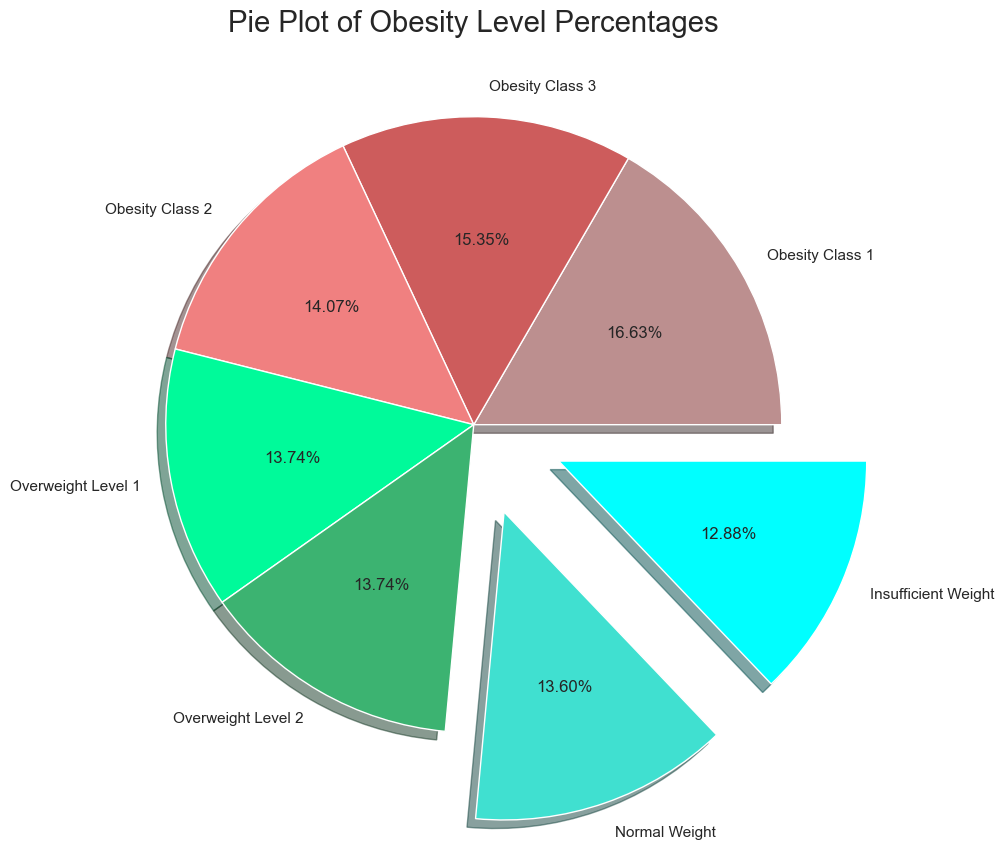

In [11]:
#create a pie chart to show that there are more overweight/obese people in the data set

#creating a table for percentages of each types of obesity levels in the data set
vc=ObeData['ObesityLevel'].value_counts()
name=[]
count=[]
#unpacking obesity level valuecounts 
for index, value in vc.iteritems():#iteritems() will be changed to items() in the future, so be mindful
    name.append(index)
    count.append(value)
#packing them into a dictonary 
data={'ObeLevelName':name,'Percentages':count}
#adding them to a data frame
pieDf=pd.DataFrame(data)
#converting the counts to  percentages 
pieDf['Percentages']=round((pieDf['Percentages']/pieDf['Percentages'].sum())*100,2)
#making the actual Pie plot
#color list
color_list=['rosybrown','indianred','lightcoral','mediumspringgreen','mediumseagreen','turquoise','aqua']
#explode values
explode_list=[0,0,0,0,0,0.3,0.3]
#Pie chart creation
plt.pie(pieDf['Percentages'],
        labels=['Obesity Class 1','Obesity Class 3','Obesity Class 2',
                'Overweight Level 1','Overweight Level 2','Normal Weight','Insufficient Weight'],
        #had to manually type out the labels so that they would line up correctly
        colors=color_list,
       autopct="%.2f%%",#two % at the end will add percentages to your chart
       explode=explode_list,
       shadow=True)
plt.title('Pie Plot of Obesity Level Percentages', fontsize=21)
plt.show()

#notes
#From the data set it can be seen that 73.52% of participants in the study are obese or overweight
#and 26.48% of participants are normal weight or underweight

### Histogram of Technology Usage

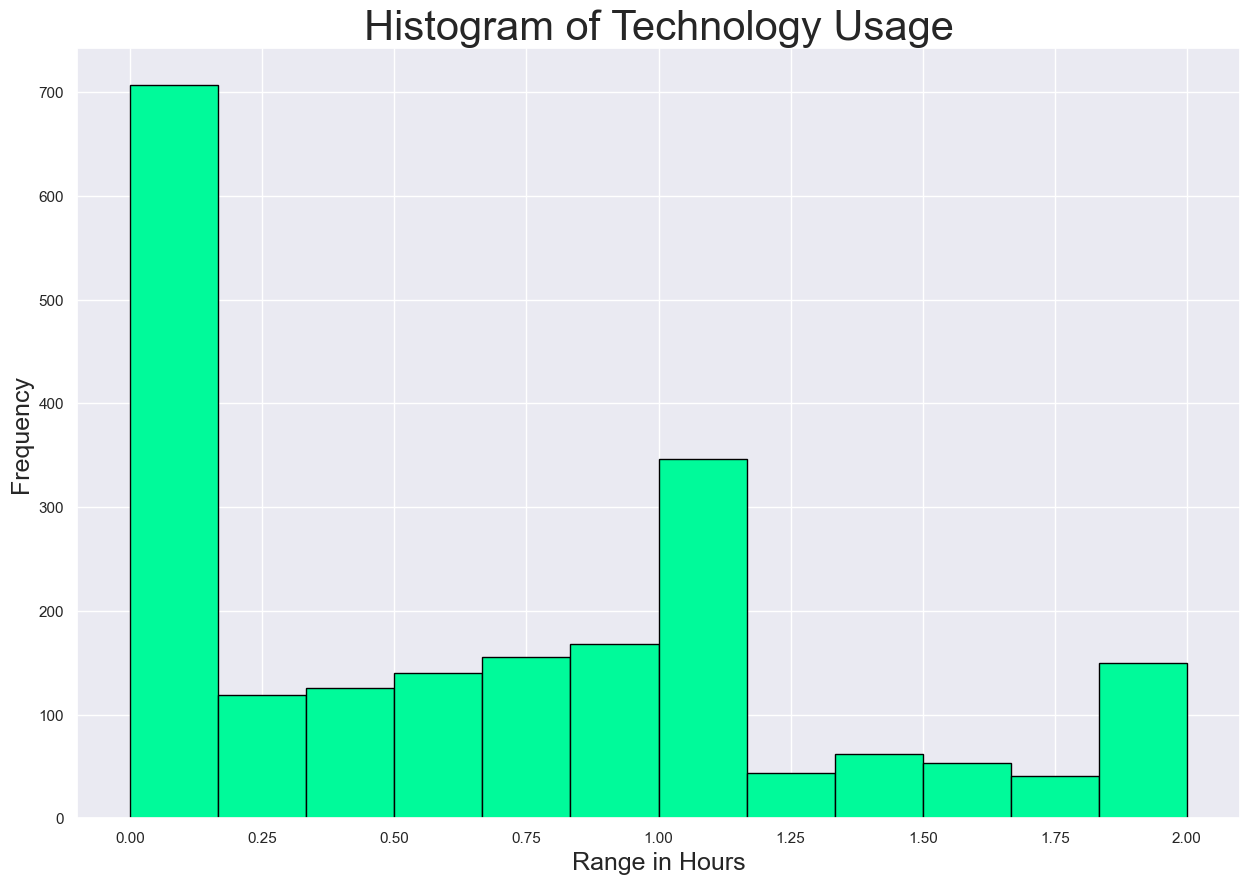

In [12]:
#Histogram of  TechnologyUsage
plt.hist(ObeData['TechnologyUsage'],
        facecolor='mediumspringgreen',
        edgecolor='black',
        bins=12)
plt.ylabel("Frequency",fontsize=18)
plt.xlabel('Range in Hours',fontsize=18)
plt.title('Histogram of Technology Usage', fontsize=30)
plt.show()


## Data Preparation for Logistical Regression

In [13]:
# creating x and y variables
X=ObeData.drop(['ObesityLevel', 'Imperical_Height'],axis=1)
y=ObeData[['ObesityLevel']]
#Handiling categorical variables
#Binary data
X_Binary=pd.get_dummies(X[['Gender','HighCaloricIntake','CalorieMonitoring','Smoke','family_history_with_overweight']],drop_first=True)
#Adding new columns to X dataset
new_columns=['Gender_Male', 'HighCaloricIntake_yes', 'CalorieMonitoring_yes',
       'Smoke_yes', 'family_history_with_overweight_yes']
for nlabel in new_columns:
    X[nlabel]=X_Binary[nlabel]
#Deleting the old columns
old_columns=['Gender','HighCaloricIntake','CalorieMonitoring','Smoke','family_history_with_overweight','Alcohol','FoodBetweenMeals','MTRANS']
for olabel in old_columns:
    X.drop(olabel,axis=1, inplace=True)
#Ordinal data
X_Ordinal=pd.get_dummies(ObeData[['Alcohol','FoodBetweenMeals','MTRANS']])
#packing X_Ordinal into X dataframe
New_columns2=['Alcohol_Always', 'Alcohol_Frequently', 'Alcohol_Sometimes',
       'Alcohol_no', 'FoodBetweenMeals_Always', 'FoodBetweenMeals_Frequently',
       'FoodBetweenMeals_Sometimes', 'FoodBetweenMeals_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking']
for nlabel2 in New_columns2:
    X[nlabel2]=X_Ordinal[nlabel2]
#categorical onehot encoding values in mark down below
X.head()

#Normalizing dataset by scaling top range
X=X.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
#Creating two datasets to perform Logistical Regression on
#Raw dataset with no untouch values in it 
X_Raw=X
#Data set without height and weight to predict obesity based on life style choices
X_LifeStyle=X.drop(['Height','Weight'],axis=1)
X_LifeStyle.head()
#Encoding the Y variables
print(y.head())
y['ObesityLevel'].unique()
obesitysizes=['Insufficient_Weight','Normal_Weight',
              'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III' ]
#to turn off warning message for replacing the row values
pd.options.mode.chained_assignment = None
#encoding the obesity size values
enc=OrdinalEncoder(categories=[obesitysizes])
#putting the encoded value into the dataframe
y['ObesityLevel']=enc.fit_transform(y[['ObesityLevel']])
y.head()

          ObesityLevel
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II


,ObesityLevel
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0


### X Categorical variables encoding 
- Gender - 0-Female 1-Male
- Alcohol - no-0001, Sometimes-0010, Frequetly-0100, Always-1000 
- HighCaloricIntake - 0-no, 1-yes
- CalorieMonitoring - 0-no, 1-yes
- Smoke - 0-no, 1-yes
- Family_history_overweight - 0-no, 1-yes
- FoodBetweenMeals - Always-1000, sometimes-0100, Frequently-0010,  no-0001 
- MTRANS - Automobile-10000, Bike- 01000, Motorbike-00100, Public_Transportation-00010, Walking-00001
### Y Categorical variable Encoding
- 'Insufficient_Weight' - 0
- 'Normal_Weight' - 1
- 'Overweight_Level_I' -  2
- 'Overweight_Level_II' - 3
- 'Obesity_Type_I' - 4
- 'Obesity_Type_II' - 5
- 'Obesity_Type_III' - 6

## Creating and training logistic regression model

In [14]:
#4 experiments that I want to do 
#80/20 X_raw
#70/30 X_raw
#80/20 LifeStyle
#70/30 LifeStyle

#Creating training sets
#80/20 X_raw

#for changing random state of each experiment
r=76


X80_20trainR, X80_20testR, y80_20trainR, y80_20testR = train_test_split(X_Raw,y,
                                                   test_size=0.20,
                                                   random_state=r)
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X80_20trainR, y80_20trainR.values.ravel())
y80_20predR=classifier.predict(X80_20testR)
#70/30 X_raw
X70_30trainR, X70_30testR, y70_30trainR, y70_30testR = train_test_split(X_Raw,y,
                                                   test_size=0.30,
                                                   random_state=r)
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X70_30trainR, y70_30trainR.values.ravel())
y70_30predR=classifier.predict(X70_30testR)
#80/20 LifeStyle
X80_20trainL, X80_20testL, y80_20trainL, y80_20testL = train_test_split(X_LifeStyle,y,
                                                   test_size=0.20,
                                                   random_state=r)
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X80_20trainL, y80_20trainL.values.ravel())
y80_20predL=classifier.predict(X80_20testL)
#70/30 LifeStyle
X70_30trainL, X70_30testL, y70_30trainL, y70_30testL = train_test_split(X_LifeStyle,y,
                                                   test_size=0.30,
                                                   random_state=r)
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X70_30trainL, y70_30trainL.values.ravel())
y70_30predL=classifier.predict(X70_30testL)

## Displaying results of logsitical regression

In [15]:
#classification reports for each test 
y_test_list=[y80_20testR,y70_30testR,y80_20testL,y70_30testL]
y_pred_list=[y80_20predR,y70_30predR,y80_20predL,y70_30predL]
name_list=['80/20 Raw Classification Report','70/30 Raw Classification Report',
           '80/20 Life Style Classification Report', '70/30 Life Style Classification Report']
for t,p,n in zip(y_test_list,y_pred_list,name_list):
    print("\t    "+n+'\n\n'+classification_report(t,p)+'\n')

    
#explaing report
#precision - How often are the predictions correct in this model
#Recall - What percentage of total weight could have been recalled
#F1 score - average of presicion and recall
#support - number of instants of each class in the dataset


#general overlook
# around 70ish accuracy for raw data and 60 for lifestyle
# Model had an amazing accuracy for obesity type 1


	    80/20 Raw Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        57
         1.0       0.64      0.64      0.64        55
         2.0       0.66      0.65      0.65        62
         3.0       0.58      0.33      0.42        55
         4.0       0.62      0.67      0.64        63
         5.0       0.73      0.95      0.83        55
         6.0       0.94      1.00      0.97        76

    accuracy                           0.74       423
   macro avg       0.72      0.72      0.71       423
weighted avg       0.73      0.74      0.72       423


	    70/30 Raw Classification Report

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        80
         1.0       0.62      0.57      0.59        81
         2.0       0.71      0.67      0.69        90
         3.0       0.60      0.38      0.47        81
         4.0       0.66      0.61      0.63       102
 

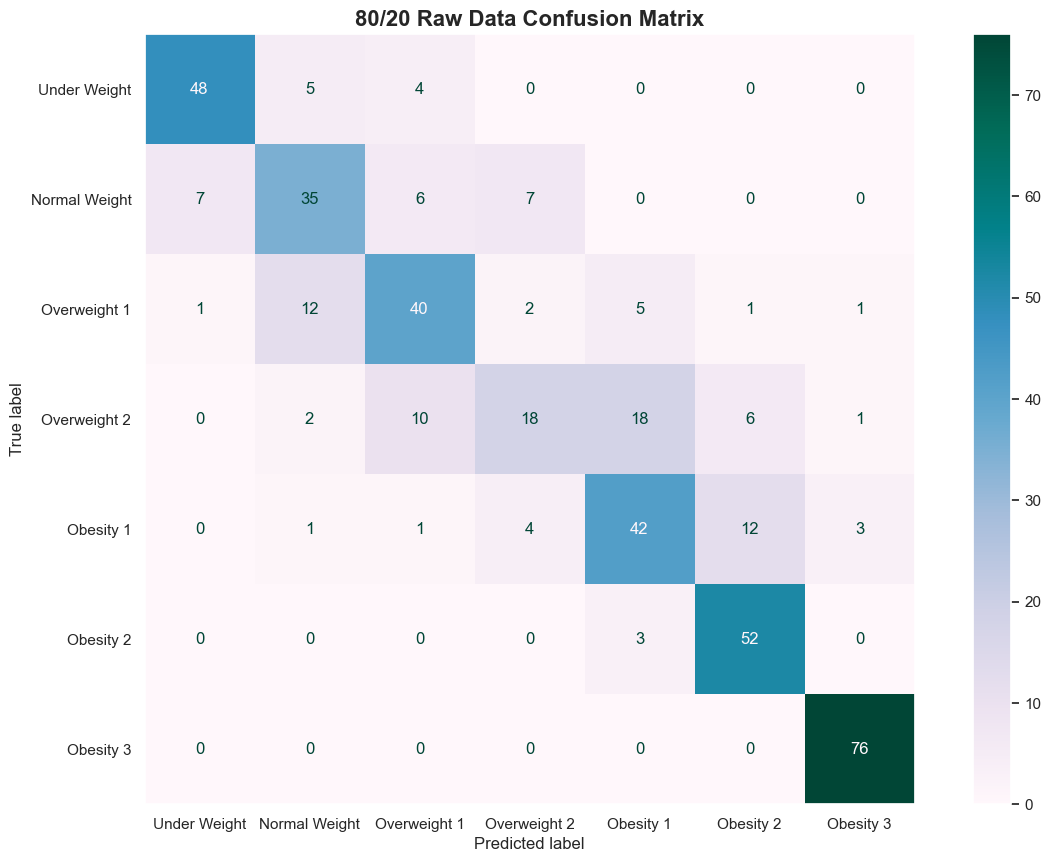

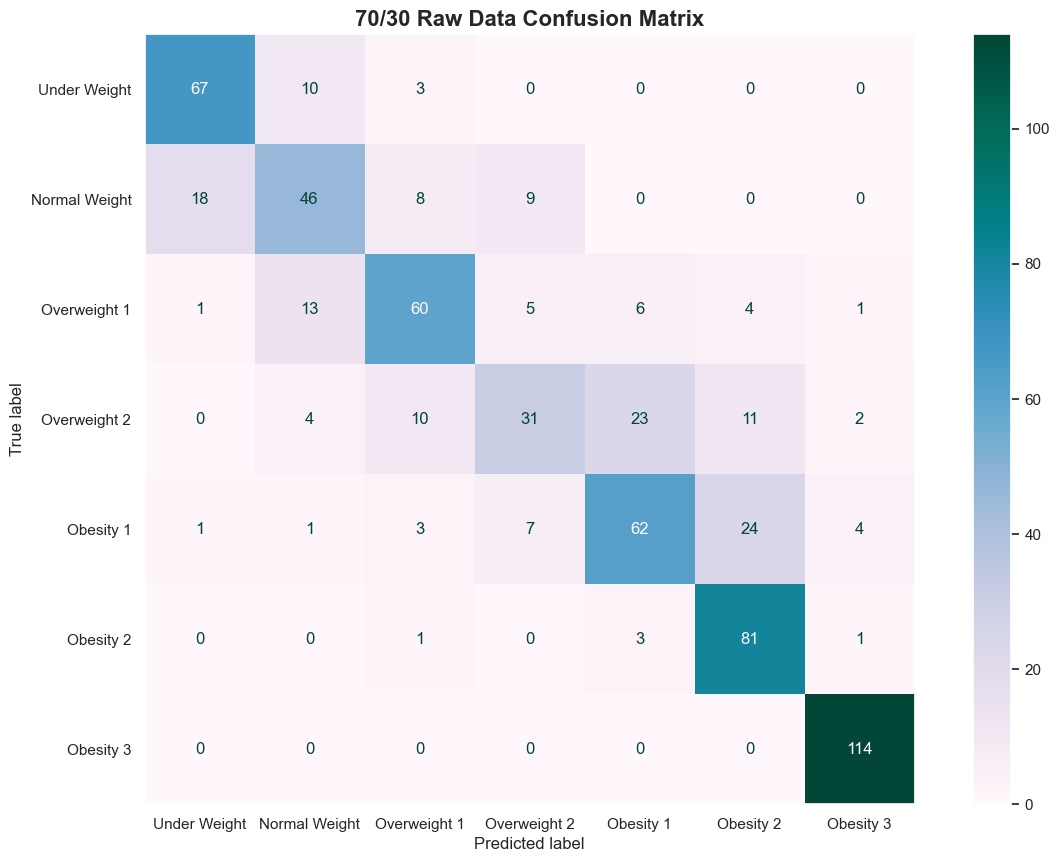

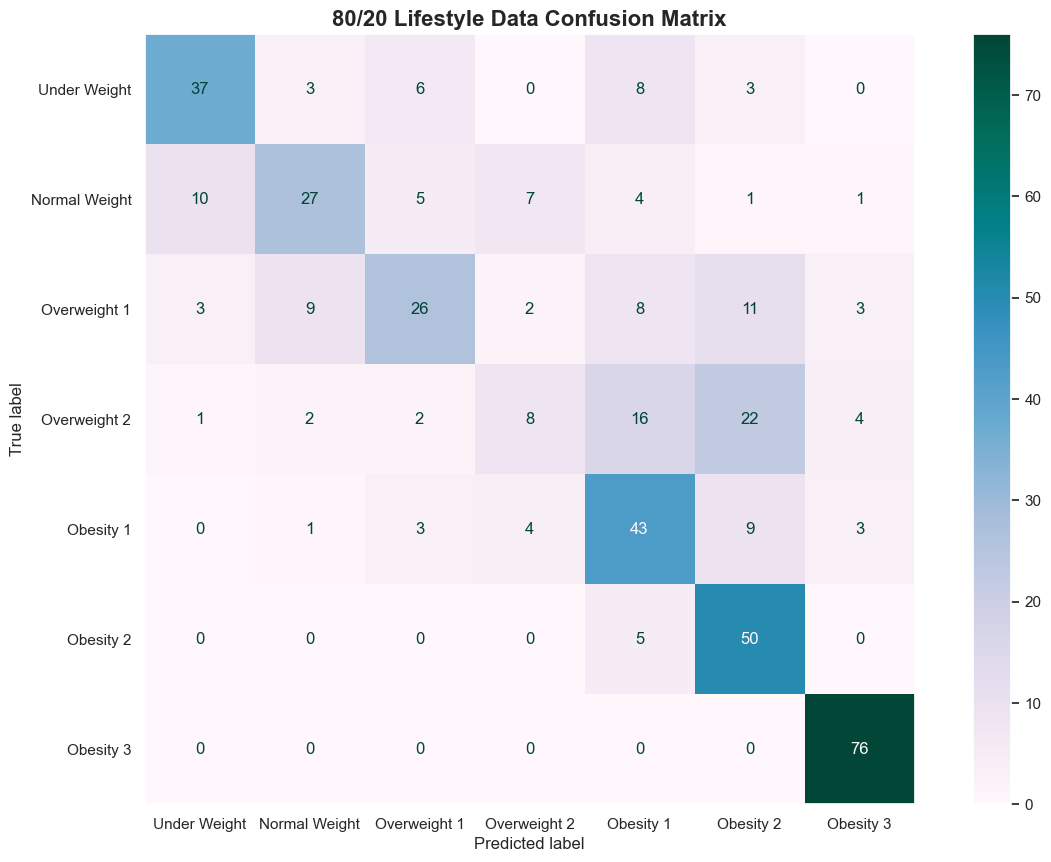

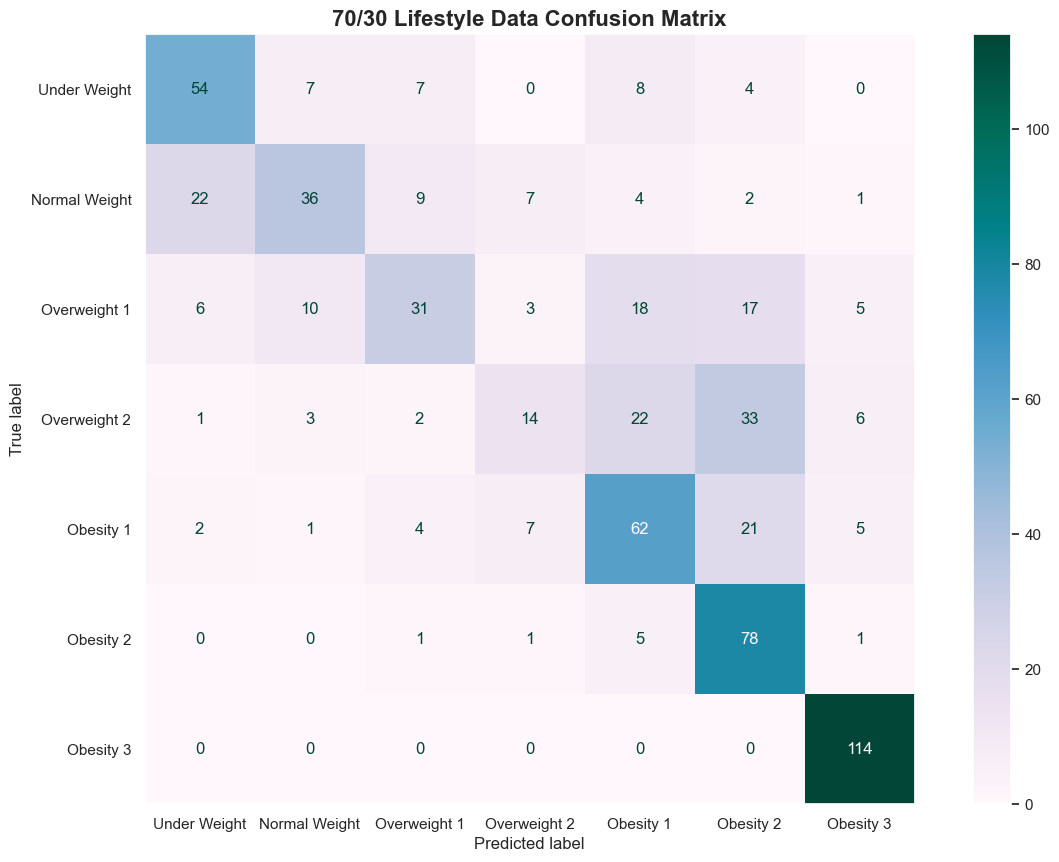

In [21]:
#creating all of the Confustion Matrixs
y_test_list=[y80_20testR,y70_30testR,y80_20testL,y70_30testL]
y_pred_list=[y80_20predR,y70_30predR,y80_20predL,y70_30predL]
matrix_name_list=['80/20 Raw Data Confusion Matrix','70/30 Raw Data Confusion Matrix',
           '80/20 Lifestyle Data Confusion Matrix', '70/30 Lifestyle Data Confusion Matrix']
#creating a for loop to create all 4 matrices
for n,t,p in zip(matrix_name_list,y_test_list,y_pred_list):
    cm=confusion_matrix(t,p)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=(['Under Weight','Normal Weight','Overweight 1','Overweight 2','Obesity 1',
                             'Obesity 2','Obesity 3']))
    disp=disp.plot(include_values=True,cmap='PuBuGn')
    plt.title(n,fontsize=16,weight='bold')
    plt.grid(None) 
    plt.show()

## Investigating Obesity Type 3

In [17]:
#Looking at P values that are important in this dataset
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ObesityLevel   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1860.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:08:14   Log-Likelihood:                -1203.9
No. Observations:                2111   AIC:                             2456.
Df Residuals:                    2087   BIC:                             2591.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -1.218e+12   4.65e+11     -2.618      0.009   -2.13e+12   -3.06e+11
Age                                    1.0086      0.099     10.203      0.000       0.815       1.202
Height                                -3.9628      0.087    -45.591      0.000      -4.133      -3.792
Weight                                10.1490      0.074    138.029      0.000      10.005      10.293
VegtableIntake                        -0.0010      0.035     -0.030      0.976      -0.070       0.068
DailyMeals                             0.0916      0.037      2.484      0.013       0.019       0.164
DailyWaterIntake                       0.0352      0.029      1.221      0.222      -0.021       0.092
PhysicalActivity                      -0.2544      0.035     -7.304      0.000      -0.323      -0.186
TechnologyUsage                       -0.0614      0.033     -1.833      0.067      -0.127       0.004
Gender_Male                            0.0815      0.026      3.132      0.002       0.030       0.133
HighCaloricIntake_yes                  0.0384      0.032      1.195      0.232      -0.025       0.101
CalorieMonitoring_yes                 -0.0723      0.047     -1.525      0.127      -0.165       0.021
Smoke_yes                             -0.0778      0.067     -1.161      0.246      -0.209       0.054
family_history_with_overweight_yes     0.2769      0.030      9.320      0.000       0.219       0.335
Alcohol_Always                      5.162e+11   1.97e+11      2.618      0.009     1.3e+11    9.03e+11
Alcohol_Frequently                  5.162e+11   1.97e+11      2.618      0.009     1.3e+11    9.03e+11
Alcohol_Sometimes                   5.162e+11   1.97e+11      2.618      0.009     1.3e+11    9.03e+11
Alcohol_no                          5.162e+11   1.97e+11      2.618      0.009     1.3e+11    9.03e+11
FoodBetweenMeals_Always             1.125e+12    4.3e+11      2.618      0.009    2.82e+11    1.97e+12
FoodBetweenMeals_Frequently         1.125e+12    4.3e+11      2.618      0.009    2.82e+11    1.97e+12
FoodBetweenMeals_Sometimes          1.125e+12    4.3e+11      2.618      0.009    2.82e+11    1.97e+12
FoodBetweenMeals_no                 1.125e+12    4.3e+11      2.618      0.009    2.82e+11    1.97e+12
MTRANS_Automobile                  -4.229e+11   1.62e+11     -2.618      0.009    -7.4e+11   -1.06e+11
MTRANS_Bike                        -4.229e+11   1.62e+11     -2.618      0.009    -7.4e+11   -1.06e+11
MTRANS_Motorbike                   -4.229e+11   1.62e+11     -2.618      0.009    -7.4e+11   -1.06e+11
MTRANS_Public_Transportation       -4.229e+11   1.62e+11     -2.618      0.009    -7.4e+11   -1.06e+11
MTRANS_Walking                     -4.229e+11   1.62e+11     -2.618      0.009    -7.4e+11   -1.

In [18]:
Class3=ObeData.loc[ObeData['ObesityLevel']=='Obesity_Type_III']
Categorical_list=['Alcohol','MTRANS','Gender',
              'HighCaloricIntake','CalorieMonitoring','Smoke',
              'family_history_with_overweight', 'FoodBetweenMeals']
#displaying general data about people with Class 3 Obesity
#Categorical Data
for name in Categorical_list:
    print('\n')
    print(Class3[name].value_counts())
#Quantitative Data
Class3.describe()

#total Class 3 Obese people 324

#summary
#99% of people from this data set with obesity class 3 sometimes drink alcohol, take public transportation, 
# are women, have a high caloric intake, and do not smoke. 100% of participants in obesity class 3 
# do not do any form of calorie monitoring, Eat 3 meals a day, and Eat 3 vegatables a day, and have a family history of family members being overweight.
# Average physical activity was 37 minutes a day and have an average screen time usage of 36 minutes a day. Have similar averages
# to the average particpant in this data set. 



Sometimes    323
no             1
Name: Alcohol, dtype: int64


Public_Transportation    323
Automobile                 1
Name: MTRANS, dtype: int64


Female    323
Male        1
Name: Gender, dtype: int64


yes    323
no       1
Name: HighCaloricIntake, dtype: int64


no    324
Name: CalorieMonitoring, dtype: int64


no     323
yes      1
Name: Smoke, dtype: int64


yes    324
Name: family_history_with_overweight, dtype: int64


Sometimes     323
Frequently      1
Name: FoodBetweenMeals, dtype: int64


,Age,Height,Weight,VegtableIntake,DailyMeals,DailyWaterIntake,PhysicalActivity,TechnologyUsage
count,324.000000,324.000000,324.000000,324.0,324.0,324.000000,324.000000,324.000000
mean,23.503086,168.755949,266.635802,3.0,3.0,2.271605,0.635802,0.604623
std,2.794841,6.526291,34.248637,0.0,0.0,0.759050,0.812108,0.281852
min,18.000000,156.000000,225.000000,3.0,3.0,1.000000,0.000000,0.000000
25%,21.000000,163.087775,241.250000,3.0,3.0,2.000000,0.000000,0.413031
50%,25.000000,166.899500,247.000000,3.0,3.0,2.000000,0.000000,0.656856
75%,26.000000,174.377150,294.000000,3.0,3.0,3.000000,1.000000,0.853701
max,26.000000,187.000000,381.000000,3.0,3.0,3.000000,2.000000,1.000000
